In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, gc, gzip, pickle, json
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
#prinf libraries versions
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)

numpy version:  1.21.6
pandas version:  1.3.5


In [3]:
#read data
INFO_COLUMNS = ['Participant_No', 'Condition', 'Segment','Time']
EMG_AMP_COLUMNS = ['Emg/Amplitude[RightOrbicularis]',
               'Emg/Amplitude[RightZygomaticus]',
               'Emg/Amplitude[RightFrontalis]',
               'Emg/Amplitude[CenterCorrugator]',
               'Emg/Amplitude[LeftFrontalis]',
               'Emg/Amplitude[LeftZygomaticus]',
               'Emg/Amplitude[LeftOrbicularis]']
EMG_CONTACT_COLUMNS = ['Emg/Contact[RightOrbicularis]',
               'Emg/Contact[RightZygomaticus]',
               'Emg/Contact[RightFrontalis]',
               'Emg/Contact[CenterCorrugator]',
               'Emg/Contact[LeftFrontalis]',
               'Emg/Contact[LeftZygomaticus]',
               'Emg/Contact[LeftOrbicularis]']
HR_COLUMNS = ['HeartRate/Average', 'Ppg/Raw.ppg']
IMU_COLUMNS = ['Accelerometer/Raw.x', 'Accelerometer/Raw.y', 'Accelerometer/Raw.z', 
               'Gyroscope/Raw.x', 'Gyroscope/Raw.y', 'Gyroscope/Raw.z']
EYE_COLUMNS = ['VerboseData.Right.PupilDiameterMm','VerboseData.Left.PupilDiameterMm']
BIOPAC_RR_COLUMNS = ['Biopac_RSP']
BIOPAC_GSR_COLUMNS = ['Biopac_GSR']
SENSOR_COLUMNS = EMG_AMP_COLUMNS + EMG_CONTACT_COLUMNS + HR_COLUMNS + IMU_COLUMNS + EYE_COLUMNS + BIOPAC_RR_COLUMNS + BIOPAC_GSR_COLUMNS

ALL_COLUMNS = INFO_COLUMNS + SENSOR_COLUMNS
SAMPLING_RATE = 10 #original sampling is 50, bu later we downsample to 10
data_folder = 'temp/synced_participant_data/'

In [4]:
df_emg_amp = pd.DataFrame()
df_emg_contact = pd.DataFrame()
df_hr = pd.DataFrame()
df_imu = pd.DataFrame()
df_eye = pd.DataFrame()
df_rr = pd.DataFrame()
df_gsr = pd.DataFrame()
df_all_sensor = pd.DataFrame() #all senosr data
df_info = pd.DataFrame() #all info data including labels

for file in os.listdir(data_folder):
    if file.endswith('.csv'):
        df = pd.read_csv(data_folder + file)
        #original sampling is 50, downsample to 10
        df = df.iloc[::5, :]
        df = df[ALL_COLUMNS]
        #dropna
        print('before dropna: ', df.shape)
        df = df.dropna()
        print('after dropna: ', df.shape)

        df_all_sensor = pd.concat([df_all_sensor, df[SENSOR_COLUMNS]])
        df_info = pd.concat([df_info, df[INFO_COLUMNS]])

        df_emg_amp = pd.concat([df_emg_amp, df[EMG_AMP_COLUMNS]])
        df_emg_contact = pd.concat([df_emg_contact, df[EMG_CONTACT_COLUMNS]])
        df_hr = pd.concat([df_hr, df[HR_COLUMNS]])
        df_imu = pd.concat([df_imu, df[IMU_COLUMNS]])
        df_eye = pd.concat([df_eye, df[EYE_COLUMNS]])
        df_rr = pd.concat([df_rr, df[BIOPAC_RR_COLUMNS]])
        df_gsr = pd.concat([df_gsr, df[BIOPAC_GSR_COLUMNS]])

        
        del df
        


before dropna:  (29391, 30)
after dropna:  (24924, 30)
before dropna:  (30110, 30)
after dropna:  (24923, 30)
before dropna:  (29078, 30)
after dropna:  (24923, 30)
before dropna:  (30549, 30)
after dropna:  (24924, 30)
before dropna:  (30540, 30)
after dropna:  (24924, 30)
before dropna:  (29944, 30)
after dropna:  (24923, 30)
before dropna:  (31300, 30)
after dropna:  (24923, 30)
before dropna:  (30757, 30)
after dropna:  (24922, 30)
before dropna:  (30786, 30)
after dropna:  (24923, 30)
before dropna:  (30535, 30)
after dropna:  (24923, 30)
before dropna:  (30387, 30)
after dropna:  (24923, 30)
before dropna:  (30228, 30)
after dropna:  (20369, 30)
before dropna:  (30456, 30)
after dropna:  (24923, 30)
before dropna:  (30697, 30)
after dropna:  (24924, 30)
before dropna:  (30076, 30)
after dropna:  (24923, 30)
before dropna:  (29955, 30)
after dropna:  (24924, 30)
before dropna:  (29995, 30)
after dropna:  (24924, 30)
before dropna:  (30254, 30)
after dropna:  (24922, 30)
before dro

In [5]:
df_all_sensor = df_all_sensor.reset_index(drop=True)
df_info = df_info.reset_index(drop=True)


df_emg_amp = df_emg_amp.reset_index(drop=True)
df_emg_contact = df_emg_contact.reset_index(drop=True)
df_hr = df_hr.reset_index(drop=True)
df_imu = df_imu.reset_index(drop=True)
df_eye = df_eye.reset_index(drop=True)
df_rr = df_rr.reset_index(drop=True)
df_gsr = df_gsr.reset_index(drop=True)



df_all_sensor.shape, df_info.shape, df_emg_amp.shape, df_emg_contact.shape, df_hr.shape, df_imu.shape, df_eye.shape, df_rr.shape, df_gsr.shape

((1129903, 26),
 (1129903, 4),
 (1129903, 7),
 (1129903, 7),
 (1129903, 2),
 (1129903, 6),
 (1129903, 2),
 (1129903, 1),
 (1129903, 1))

In [6]:
print(df_all_sensor.isnull().sum())
df_all_sensor.describe().round(2)

Emg/Amplitude[RightOrbicularis]      0
Emg/Amplitude[RightZygomaticus]      0
Emg/Amplitude[RightFrontalis]        0
Emg/Amplitude[CenterCorrugator]      0
Emg/Amplitude[LeftFrontalis]         0
Emg/Amplitude[LeftZygomaticus]       0
Emg/Amplitude[LeftOrbicularis]       0
Emg/Contact[RightOrbicularis]        0
Emg/Contact[RightZygomaticus]        0
Emg/Contact[RightFrontalis]          0
Emg/Contact[CenterCorrugator]        0
Emg/Contact[LeftFrontalis]           0
Emg/Contact[LeftZygomaticus]         0
Emg/Contact[LeftOrbicularis]         0
HeartRate/Average                    0
Ppg/Raw.ppg                          0
Accelerometer/Raw.x                  0
Accelerometer/Raw.y                  0
Accelerometer/Raw.z                  0
Gyroscope/Raw.x                      0
Gyroscope/Raw.y                      0
Gyroscope/Raw.z                      0
VerboseData.Right.PupilDiameterMm    0
VerboseData.Left.PupilDiameterMm     0
Biopac_RSP                           0
Biopac_GSR               

,Emg/Amplitude[RightOrbicularis],Emg/Amplitude[RightZygomaticus],Emg/Amplitude[RightFrontalis],Emg/Amplitude[CenterCorrugator],Emg/Amplitude[LeftFrontalis],Emg/Amplitude[LeftZygomaticus],Emg/Amplitude[LeftOrbicularis],Emg/Contact[RightOrbicularis],Emg/Contact[RightZygomaticus],Emg/Contact[RightFrontalis],Emg/Contact[CenterCorrugator],Emg/Contact[LeftFrontalis],Emg/Contact[LeftZygomaticus],Emg/Contact[LeftOrbicularis],HeartRate/Average,Ppg/Raw.ppg,Accelerometer/Raw.x,Accelerometer/Raw.y,Accelerometer/Raw.z,Gyroscope/Raw.x,Gyroscope/Raw.y,Gyroscope/Raw.z,VerboseData.Right.PupilDiameterMm,VerboseData.Left.PupilDiameterMm,Biopac_RSP,Biopac_GSR
count,1129903.0,1129903.0,1129903.0,1129903.0,1129903.0,1129903.0,1129903.0,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00,1129903.00
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9148.26,6581.01,8297.25,10322.30,8131.24,7140.72,8926.94,80.73,24591.43,0.62,0.02,-0.77,0.64,-0.47,0.89,4.86,4.82,6.91,6.17
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1723.29,7665.39,2479.17,4460.75,2386.23,1249.36,2187.61,13.33,4431.97,0.11,0.06,0.11,2.36,2.67,2.35,1.07,1.05,1.88,3.39
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5872.00,0.00,4044.00,5938.00,4118.00,4252.00,5176.00,46.48,800.00,-0.43,-0.97,-1.06,-141.73,-110.35,-128.82,1.52,1.50,-8.78,0.56
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8092.00,5208.00,6652.00,8158.00,6662.00,6234.00,7476.00,71.72,22416.00,0.55,-0.01,-0.84,0.09,-1.10,0.52,4.08,4.12,6.58,3.57
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8762.00,6018.00,7938.00,9456.00,7648.00,6860.00,8350.00,79.95,24544.00,0.62,0.02,-0.79,0.64,-0.46,0.89,4.95,4.88,7.44,5.59
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9624.00,6904.00,9480.00,10734.00,9296.00,8010.00,9600.00,89.64,26736.00,0.69,0.06,-0.74,1.19,0.15,1.25,5.65,5.60,7.99,8.21
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21764.00,131070.00,70384.00,69720.00,75280.00,16620.00,19384.00,132.02,65520.00,1.15,1.05,0.36,146.49,75.78,206.98,7.80,7.46,8.96,22.89


In [7]:
df_info.columns

Index(['Participant_No', 'Condition', 'Segment', 'Time'], dtype='object')

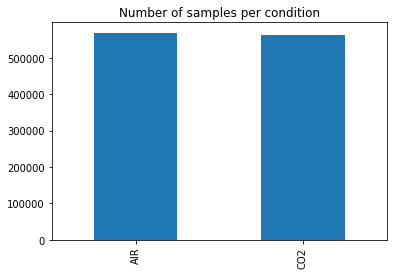

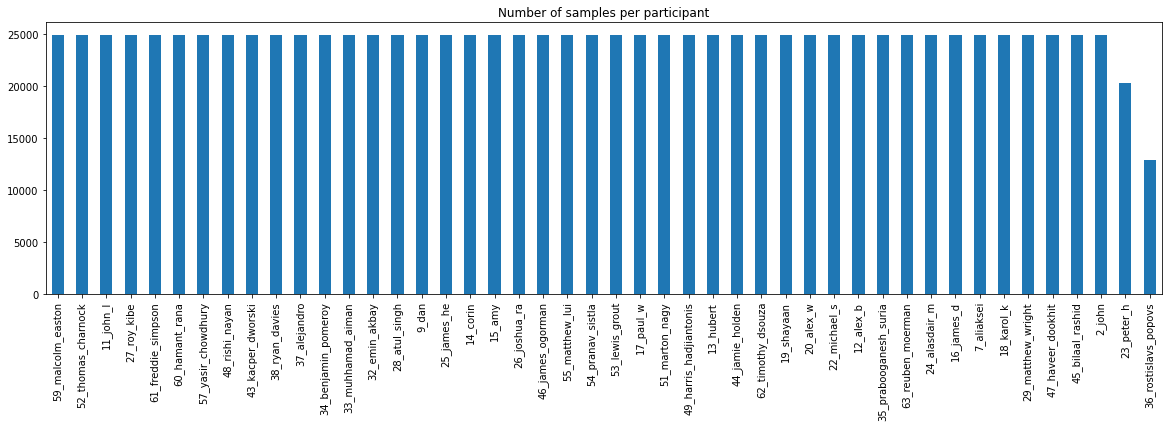

In [8]:
df_info.Condition.value_counts().plot(kind='bar')
plt.title('Number of samples per condition')
plt.show()

plt.figure(figsize=(20, 5))
df_info.Participant_No.value_counts().plot(kind='bar')
plt.title('Number of samples per participant')
plt.show()


In [9]:
#sliding window segmentation
WINDOW_SIZE_SECONDS = 30
WINDOW_SIZE = WINDOW_SIZE_SECONDS * SAMPLING_RATE
STEP_SIZE = (WINDOW_SIZE_SECONDS//6) * SAMPLING_RATE #get prediction every 5 seconds
#perform segmentation for each user and each condition
segments_all_sensor_dict = {}
segments_emg_amp_dict = {}
segments_emg_contact_dict = {}
segments_hr_dict = {}
segments_imu_dict = {}
segments_eye_dict = {}
segments_rr_dict = {}
segments_gsr_dict = {}
segments_labels_dict = {}

for user in df_info.Participant_No.unique():
    user_segments_all_sensor = []
    user_segments_emg_amp_sensor = []
    user_segments_emg_contact_sensor = []
    user_segments_hr_sensor = []
    user_segments_imu_sensor = []
    user_segments_eye_sensor = []
    user_segments_rr_sensor = []
    user_segments_gsr_sensor = []
    user_labels = []
    for condition in df_info.Condition.unique():
        user_cond_all_sensor_df = df_all_sensor[(df_info.Participant_No == user) & (df_info.Condition == condition)]
        user_cond_emg_amp_df = user_cond_all_sensor_df[EMG_AMP_COLUMNS]
        user_cond_emg_contact_df = user_cond_all_sensor_df[EMG_CONTACT_COLUMNS]
        user_cond_hr_df = user_cond_all_sensor_df[HR_COLUMNS]
        user_cond_imu_df = user_cond_all_sensor_df[IMU_COLUMNS]
        user_cond_eye_df = user_cond_all_sensor_df[EYE_COLUMNS]
        user_cond_rr_df = user_cond_all_sensor_df[BIOPAC_RR_COLUMNS]
        user_cond_gsr_df = user_cond_all_sensor_df[BIOPAC_GSR_COLUMNS]
        user_cond_info_df = df_info[(df_info.Participant_No == user) & (df_info.Condition == condition)]
        
        for i in range(0, len(user_cond_all_sensor_df) - WINDOW_SIZE, STEP_SIZE):
            user_segments_all_sensor.append(user_cond_all_sensor_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_emg_amp_sensor.append(user_cond_emg_amp_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_emg_contact_sensor.append(user_cond_emg_contact_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_hr_sensor.append(user_cond_hr_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_imu_sensor.append(user_cond_imu_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_eye_sensor.append(user_cond_eye_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_rr_sensor.append(user_cond_rr_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_gsr_sensor.append(user_cond_gsr_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_labels.append(user_cond_info_df.Condition.iloc[i:i+WINDOW_SIZE].values)
            
    segments_all_sensor_dict[user] = user_segments_all_sensor
    
    segments_emg_amp_dict[user] = user_segments_emg_amp_sensor
    segments_emg_contact_dict[user] = user_segments_emg_contact_sensor
    segments_hr_dict[user] = user_segments_hr_sensor
    segments_imu_dict[user] = user_segments_imu_sensor
    segments_eye_dict[user] = user_segments_eye_sensor
    segments_rr_dict[user] = user_segments_rr_sensor
    segments_gsr_dict[user] = user_segments_gsr_sensor
    
    segments_labels_dict[user] = user_labels
    #print segments and labels shape
    print('user {} segments shape: '.format(user), np.array(user_segments_all_sensor).shape)
    print('user {} labels shape: '.format(user), np.array(user_labels).shape)
    print()

del df_all_sensor, df_info


user 11_john_l segments shape:  (488, 300, 26)
user 11_john_l labels shape:  (488, 300)

user 12_alex_b segments shape:  (488, 300, 26)
user 12_alex_b labels shape:  (488, 300)

user 13_hubert segments shape:  (488, 300, 26)
user 13_hubert labels shape:  (488, 300)

user 14_corin segments shape:  (488, 300, 26)
user 14_corin labels shape:  (488, 300)

user 15_amy segments shape:  (488, 300, 26)
user 15_amy labels shape:  (488, 300)

user 16_james_d segments shape:  (488, 300, 26)
user 16_james_d labels shape:  (488, 300)

user 17_paul_w segments shape:  (488, 300, 26)
user 17_paul_w labels shape:  (488, 300)

user 18_karol_k segments shape:  (488, 300, 26)
user 18_karol_k labels shape:  (488, 300)

user 19_shayaan segments shape:  (488, 300, 26)
user 19_shayaan labels shape:  (488, 300)

user 20_alex_w segments shape:  (488, 300, 26)
user 20_alex_w labels shape:  (488, 300)

user 22_michael_s segments shape:  (488, 300, 26)
user 22_michael_s labels shape:  (488, 300)

user 23_peter_h s

In [10]:
#get a list of all users
users = list(segments_all_sensor_dict.keys())
print(len(users))
   

46


In [11]:
# Create temp notebook folder if it does not exist
TEMP_FOLDER = 'temp/6_end_to_end_preprocess_data'
if(not os.path.exists(TEMP_FOLDER)):
    os.mkdir(TEMP_FOLDER)


In [14]:
#save segments and labels
with gzip.open(os.path.join(TEMP_FOLDER, 'segments_all_sensor_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_all_sensor_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_emg_amp_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_emg_amp_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_emg_contact_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_emg_contact_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_hr_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_hr_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_imu_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_imu_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_eye_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_eye_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_rr_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_rr_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_gsr_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_gsr_dict , f)
    
with gzip.open(os.path.join(TEMP_FOLDER, 'segments_labels_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_labels_dict, f)
